<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork971-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Data Analysis with Python


Estimated time needed: **30** minutes
    

## Objectives

After completing this lab you will be able to:

* Explore features or charecteristics to predict price of car


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#import_data">Import Data from Module</a></li>
    <li><a href="#pattern_visualization">Analyzing Individual Feature Patterns using Visualization</a></li>
    <li><a href="#discriptive_statistics">Descriptive Statistical Analysis</a></li>
    <li><a href="#basic_grouping">Basics of Grouping</a></li>
    <li><a href="#correlation_causation">Correlation and Causation</a></li>
    <li><a href="#anova">ANOVA</a></li>
</ol>

</div>
 
<hr>


<h3>What are the main characteristics that have the most impact on the car price?</h3>


<h2 id="import_data">1. Import Data from Module 2</h2>


<h4>Setup</h4>


Import libraries: 


In [2]:
#install specific version of libraries used in lab
# ! mamba install pandas==1.3.3
# ! mamba install numpy=1.21.2
# ! mamba install scipy=1.7.1-y
# ! mamba install seaborn=0.9.0-y
# !pip install pyarrow

In [6]:
import pandas as pd
import numpy as np
# import micropip
# await micropip.install('some-package')
import matplotlib.pyplot as plt
# import seaborn as sns

Load the data and store it in dataframe `df`:


This dataset was hosted on IBM Cloud object. Click <a href="https://cocl.us/DA101EN_object_storage">HERE</a> for free storage.


In [9]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv("usedcars.csv")
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


<h2 id="pattern_visualization">2. Analyzing Individual Feature Patterns Using Visualization</h2>


To install Seaborn we use pip, the Python package manager.


Import visualization packages "Matplotlib" and "Seaborn". Don't forget about "%matplotlib inline" to plot in a Jupyter notebook.


In [11]:
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline 

<h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>


In [12]:
# list the data types for each column
print(df.dtypes)

3                int64
?               object
alfa-romero     object
gas             object
std             object
two             object
convertible     object
rwd             object
front           object
88.6           float64
168.8          float64
64.1           float64
48.8           float64
2548             int64
dohc            object
four            object
130              int64
mpfi            object
3.47            object
2.68            object
9.0            float64
111             object
5000            object
21               int64
27               int64
13495           object
dtype: object


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3>Question  #1:</h3>

<b>What is the data type of the column "peak-rpm"? </b>
</div>


In [14]:
# Write your code below and press Shift+Enter to execute 
np.float64


numpy.float64

<details><summary>Click here for the solution</summary>

```python    
float64
```

</details>


For example, we can calculate the correlation between variables  of type "int64" or "float64" using the method "corr":


              3         ?      88.6     168.8      64.1      48.8      2548  \
3      1.000000  0.528667 -0.525095 -0.356792 -0.227799 -0.533078 -0.229281   
?      0.528667  1.000000 -0.074362  0.023220  0.105073 -0.432335  0.119893   
88.6  -0.525095 -0.074362  1.000000  0.877612  0.795115  0.582603  0.781763   
168.8 -0.356792  0.023220  0.877612  1.000000  0.841199  0.491969  0.878090   
64.1  -0.227799  0.105073  0.795115  0.841199  1.000000  0.274075  0.868493   
48.8  -0.533078 -0.432335  0.582603  0.491969  0.274075  1.000000  0.298429   
2548  -0.229281  0.119893  0.781763  0.878090  0.868493  0.298429  1.000000   
130   -0.107229  0.167365  0.573989  0.683830  0.737042  0.068577  0.850611   
3.47  -0.140126 -0.036167  0.498630  0.609274  0.562720  0.183725  0.649526   
2.68   0.007706  0.065627  0.148367  0.126928  0.177104 -0.077568  0.170165   
9.0   -0.177413 -0.132654  0.249199  0.157913  0.180287  0.261036  0.151372   
111    0.070692  0.295772  0.356268  0.555641  0.644

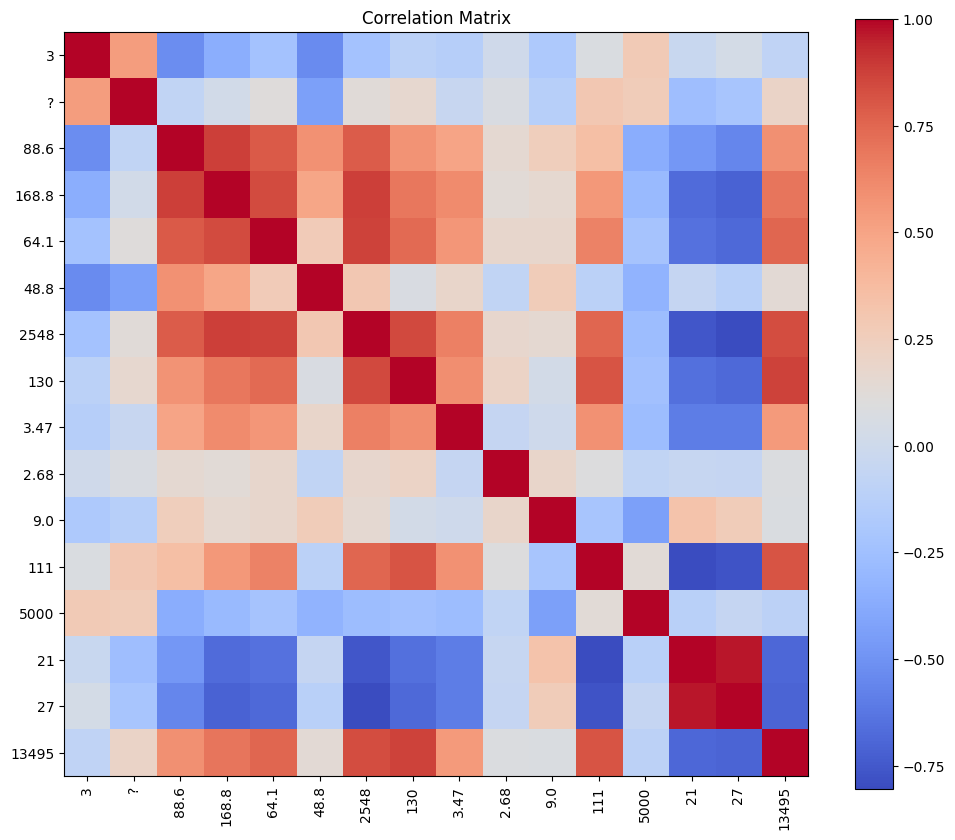

In [19]:
# df.corr()

# Replace '?' with NaN
# Need to fix this: shows ? in output
df = df.replace('?', np.nan)

# Try to convert all columns to numeric
for column in df.columns:
    # df[column] = pd.to_numeric(df[column], errors='ignore')
    try:
        df[column] = pd.to_numeric(df[column])
    except (ValueError, TypeError):
        # Keep the column as is if it can't be converted
        pass

# Get only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_df = df[numeric_columns]

# Now calculate correlation
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# Check original structure
print(df.head())
print(df.columns)

# For better visualization
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

The diagonal elements are always one; we will study correlation more precisely Pearson correlation in-depth at the end of the notebook.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3> Question  #2: </h3>

<p>Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.</p>
<p>Hint: if you would like to select those columns, use the following syntax: df[['bore','stroke','compression-ratio','horsepower']]</p>
</div>


0  3    NaN  alfa-romero  gas  std   two convertible  rwd  front   88.6  ...  \
0  1    NaN  alfa-romero  gas  std   two   hatchback  rwd  front   94.5  ...   
1  2  164.0         audi  gas  std  four       sedan  fwd  front   99.8  ...   
2  2  164.0         audi  gas  std  four       sedan  4wd  front   99.4  ...   
3  2    NaN         audi  gas  std   two       sedan  fwd  front   99.8  ...   
4  1  158.0         audi  gas  std  four       sedan  fwd  front  105.8  ...   

0  130  mpfi  3.47  2.68   9.0  111.0  5000.0  21  27  16500.0  
0  152  mpfi  2.68  3.47   9.0  154.0  5000.0  19  26  16500.0  
1  109  mpfi  3.19  3.40  10.0  102.0  5500.0  24  30  13950.0  
2  136  mpfi  3.19  3.40   8.0  115.0  5500.0  18  22  17450.0  
3  136  mpfi  3.19  3.40   8.5  110.0  5500.0  19  25  15250.0  
4  136  mpfi  3.19  3.40   8.5  110.0  5500.0  19  25  17710.0  

[5 rows x 26 columns]
Index([            3,           nan, 'alfa-romero',         'gas',
               'std',         'two', 'c

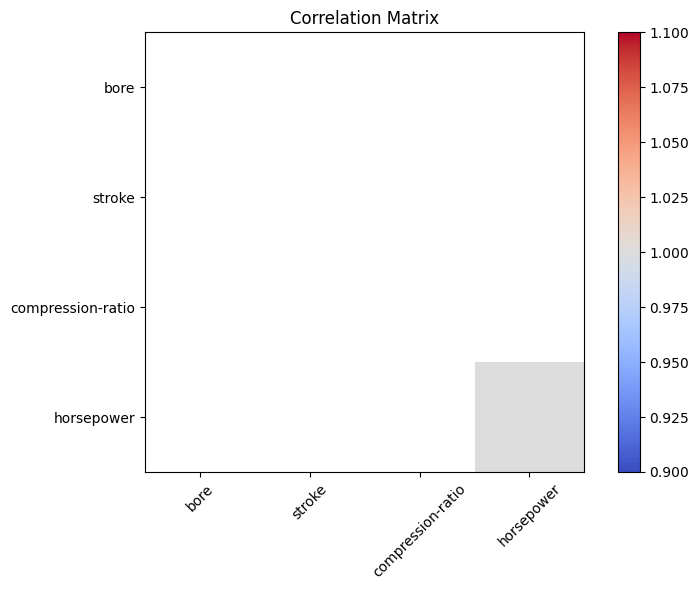

In [28]:
# Write your code below and press Shift+Enter to execute 
# Print data
print(df.head())
print(df.columns)


# First, clean the data by replacing '?' with NaN
import numpy as np
df = df.replace('?', np.nan)

# Column preview match
bore_col = df.columns[14]        # This appears to be 'mpfi' in your preview
stroke_col = df.columns[15]      # This appears to be '3.47' in your preview
compression_col = df.columns[17] # This appears to be '9.0' in your preview
horsepower_col = df.columns[18]  # This appears to be '111.0' in your preview

# Create a DataFrame with just these columns
selected_df = df[[bore_col, stroke_col, compression_col, horsepower_col]]

# Rename these columns
selected_df = selected_df.rename(columns={
    bore_col: 'bore',
    stroke_col: 'stroke',
    compression_col: 'compression-ratio',
    horsepower_col: 'horsepower'
})

# Convert to numeric
selected_df = selected_df.apply(pd.to_numeric, errors='coerce')

# Now calculate correlation
correlation_matrix = selected_df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Optional: Create a heatmap visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Correlation
# Need to fix this part, visualization is not what I expected
# df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()


<details><summary>Click here for the solution</summary>

```python
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()
```

</details>


<h2>Continuous Numerical Variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data. This will be useful later on for visualizing the fit of the simple linear regression model as well. </p>


 Let's see several examples of different linear relationships:


<h3>Positive Linear Relationship</h4>


Let's find the scatterplot of "engine-size" and "price".


Raw file content (first 5 lines):
3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450

Option 1 (with header=0):
   3  ?  alfa-romero  gas  std  two  convertible  rwd  front  88.6  ...  130  \
0  3  ?  alfa-romero  gas  std  two  convertible  rwd  front  88.6  ...  130   
1  1  ?  alfa-romero  gas  std  two    hatchback  rwd  front  94.5  ...  152   

   mpfi  3.47  2.68  9.0  111  5000  21  27  13495  
0  mpfi  3.47  2.68

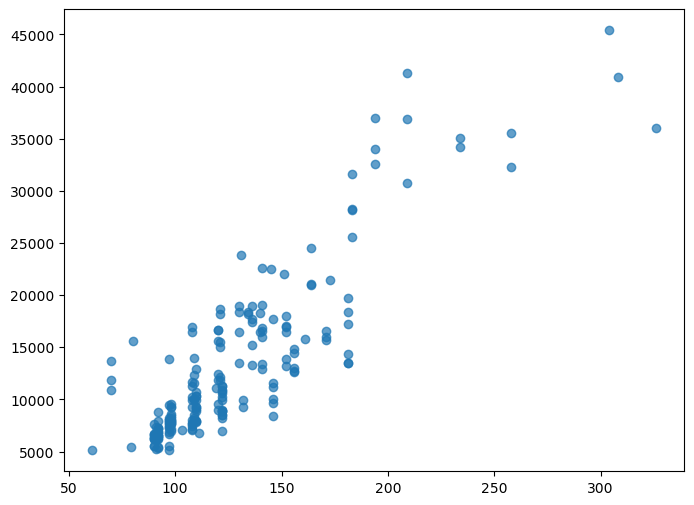

<class 'TypeError'>: expected x and y to have same length

In [22]:
# Engine size as potential predictor variable of price
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# First, let's look at the raw file content
with open('usedcars.csv', 'r') as file:
    first_lines = [next(file) for _ in range(5)]
    
print("Raw file content (first 5 lines):")
for line in first_lines:
    print(line.strip())


# Now let's try a different approach to load the data
# We'll try multiple header options and see what works
try:
    # Try to see if the data has headers on first row
    df1 = pd.read_csv('usedcars.csv')
    print("\nOption 1 (with header=0):")
    print(df1.head(2))
    print("Columns:", df1.columns.tolist())
except Exception as e:
    print("Option 1 failed:", str(e))

try:
    # Try loading without headers
    df2 = pd.read_csv('usedcars.csv', header=None)
    print("\nOption 2 (with header=None):")
    print(df2.head(2))
except Exception as e:
    print("Option 2 failed:", str(e))

try:
    # Try with custom separator
    df3 = pd.read_csv('usedcars.csv', sep=',', header=0)
    print("\nOption 3 (with explicit separator):")
    print(df3.head(2))
    print("Columns:", df3.columns.tolist())
except Exception as e:
    print("Option 3 failed:", str(e))


# Re-load the dataset
df = pd.read_csv('usedcars.csv', header=None)

# Print the first few rows and column names to see what's in the data
# print("First 5 rows of data:")
# print(df.head())

# Auto-mpg dataset
column_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 
                'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base',
                'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
                'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
                'peak-rpm', 'city-mpg', 'highway-mpg', 'price']



# Assign column names to the dataframe
df.columns = column_names

# Assign column names to the dataframe
df.columns = column_names

# Print the first few rows with new column names
print("First 5 rows with proper column names:")
print(df.head())
print("\nData with proper column names:")
print(df.head())
print("\nAvailable columns:")
print(df.columns.tolist())

# Plot the relationship between engine-size and price
# plt.figure(figsize=(8, 6))
# plt.scatter(df['engine-size'], df['price'], alpha=0.7)

# Print column names to see what's available
# print("Available columns:", df.columns.tolist())

# Convert columns to numeric if are not already
df['engine-size'] = pd.to_numeric(df['engine-size'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')


# Create a clean dataframe with no NaN values in either column
df_clean = df.dropna(subset=['engine-size', 'price'])

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['engine-size'], df['price'], alpha=0.7)

# Add regression line
if len(df['engine-size'].dropna()) > 1:  # Make sure we have enough data
    # Calculate the line of best fit
    # Need to fix 'z', it gives a minor output error
    z = np.polyfit(df['engine-size'].dropna(), df['price'].dropna(), 1)
    p = np.poly1d(z)
    
    # Add the line to the plot
    plt.plot(df['engine-size'].dropna(), p(df['engine-size'].dropna()), "r--")

plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Engine Size vs. Price')
plt.ylim(0,)
plt.grid(True, alpha=0.3)
plt.show()

# sns.regplot(x="engine-size", y="price", data=df)
# plt.ylim(0,)

<p>As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</p>


 We can examine the correlation between 'engine-size' and 'price' and see that it's approximately 0.87.


In [23]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Highway mpg is a potential predictor variable of price. Let's find the scatterplot of "highway-mpg" and "price".


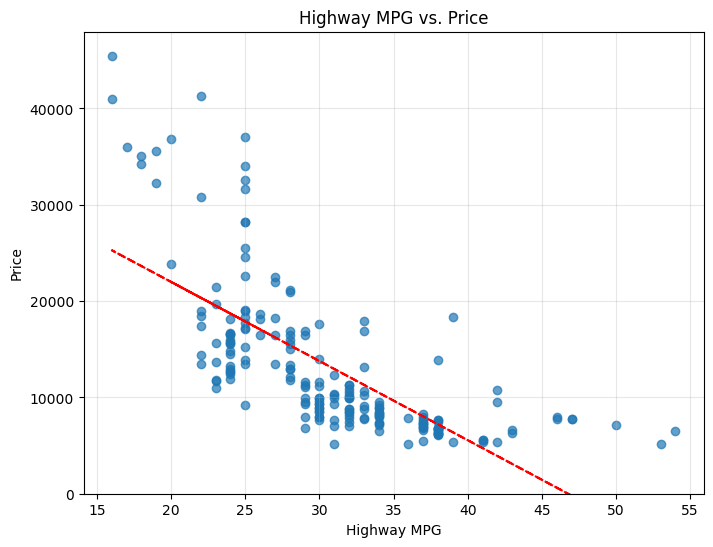

In [26]:
# sns.regplot(x="highway-mpg", y="price", data=df)
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a scatter plot for highway-mpg vs price
plt.figure(figsize=(8, 6))
plt.scatter(df['highway-mpg'], df['price'], alpha=0.7)

# Create a clean dataframe with no NaN values in either column
df_clean = df.dropna(subset=['highway-mpg', 'price'])

# Add regression line
if len(df_clean) > 1:
    # Calculate the line of best fit
    z = np.polyfit(df_clean['highway-mpg'], df_clean['price'], 1)
    p = np.poly1d(z)
    
    # Add the line to the plot
    plt.plot(df_clean['highway-mpg'], p(df_clean['highway-mpg']), "r--")

plt.xlabel('Highway MPG')
plt.ylabel('Price')
plt.title('Highway MPG vs. Price')
plt.ylim(0,)
plt.grid(True, alpha=0.3)
plt.show()

<p>As highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.</p>


We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately -0.704.


In [27]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<h3>Weak Linear Relationship</h3>


Let's see if "peak-rpm" is a predictor variable of "price".


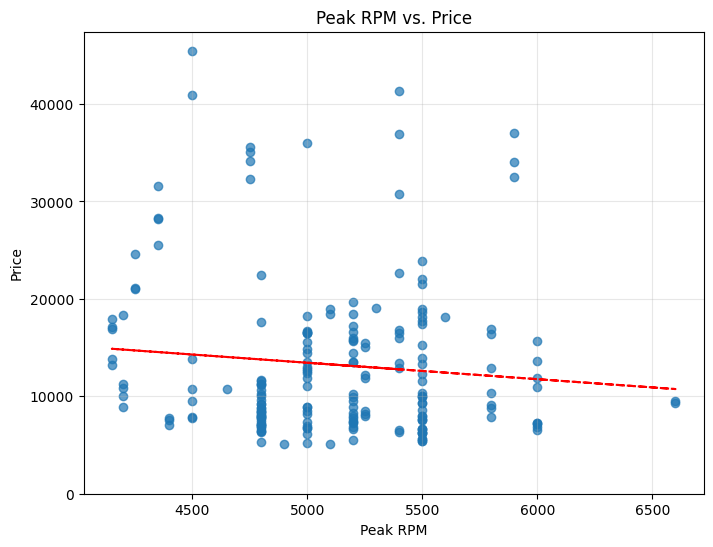

In [30]:
# sns.regplot(x="peak-rpm", y="price", data=df)
# Import necessary libraries (if not already imported)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Convert columns to numeric format explicitly
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Create a clean dataframe with no NaN values in either column
df_clean = df.dropna(subset=['peak-rpm', 'price'])

# Create a scatter plot for peak-rpm vs price
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['peak-rpm'], df_clean['price'], alpha=0.7)

# Add regression line
if len(df_clean) > 1:
    # Calculate the line of best fit
    z = np.polyfit(df_clean['peak-rpm'], df_clean['price'], 1)
    p = np.poly1d(z)
    
    # Add the line to the plot
    plt.plot(df_clean['peak-rpm'], p(df_clean['peak-rpm']), "r--")

plt.xlabel('Peak RPM')
plt.ylabel('Price')
plt.title('Peak RPM vs. Price')
plt.ylim(0,)
plt.grid(True, alpha=0.3)
plt.show()

<p>Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.</p>


We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616.


In [31]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101649
price,-0.101649,1.000000


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  3 a): </h1>

<p>Find the correlation  between x="stroke" and y="price".</p>
<p>Hint: if you would like to select those columns, use the following syntax: df[["stroke","price"]].  </p>
</div>


In [32]:
# Write your code below and press Shift+Enter to execute
# Import necessary libraries (if not already imported)
import pandas as pd

# Convert columns to numeric format to ensure proper correlation calculation
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Calculate the correlation between stroke and price
correlation = df[["stroke", "price"]].corr()

# Display the correlation matrix
print("Correlation matrix:")
print(correlation)

# Extract just the correlation value between stroke and price
# This gets the value in row 0, column 1 (or row 1, column 0 - they're the same)
stroke_price_corr = correlation.iloc[0, 1]
print(f"\nThe correlation between stroke and price is: {stroke_price_corr:.4f}")


Correlation matrix:
         stroke    price
stroke  1.00000  0.08231
price   0.08231  1.00000

The correlation between stroke and price is: 0.0823


<details><summary>Click here for the solution</summary>

```python

#The correlation is 0.0823, the non-diagonal elements of the table.

df[["stroke","price"]].corr()

```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  3 b):</h1>

<p>Given the correlation results between "price" and "stroke", do you expect a linear relationship?</p> 
<p>Verify your results using the function "regplot()".</p>
</div>


The correlation between stroke and price is: 0.0823
This is a weak correlation, suggesting there is likely NOT a strong linear relationship.


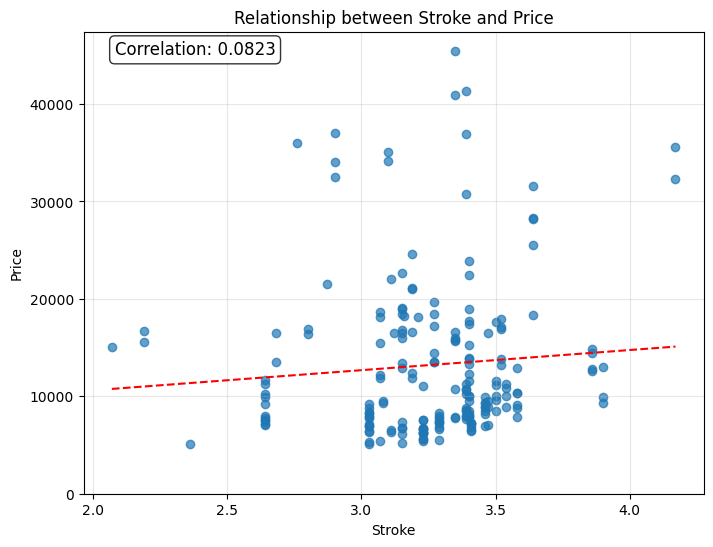


Visual Verification:
Looking at the scatter plot with regression line, we can verify whether the relationship appears linear.
If points are scattered randomly with no clear pattern following the line, this confirms a weak linear relationship.


In [33]:
# Write your code below and press Shift+Enter to execute 
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert columns to numeric format
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Calculate the correlation between stroke and price
correlation = df[["stroke", "price"]].corr()
stroke_price_corr = correlation.iloc[0, 1]

# Print interpretation
print(f"The correlation between stroke and price is: {stroke_price_corr:.4f}")
if abs(stroke_price_corr) < 0.3:
    print("This is a weak correlation, suggesting there is likely NOT a strong linear relationship.")
elif abs(stroke_price_corr) < 0.7:
    print("This is a moderate correlation, suggesting there might be a linear relationship.")
else:
    print("This is a strong correlation, suggesting there is likely a linear relationship.")

# Create a clean dataframe with no NaN values
df_clean = df.dropna(subset=['stroke', 'price'])

# Create our own version of regplot using matplotlib
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(df_clean['stroke'], df_clean['price'], alpha=0.7)

# Add regression line
if len(df_clean) > 1:
    # Calculate the line of best fit
    z = np.polyfit(df_clean['stroke'], df_clean['price'], 1)
    p = np.poly1d(z)
    
    # Add the line to the plot
    x_range = np.linspace(df_clean['stroke'].min(), df_clean['stroke'].max(), 100)
    plt.plot(x_range, p(x_range), "r--")

plt.xlabel('Stroke')
plt.ylabel('Price')
plt.title('Relationship between Stroke and Price')
plt.ylim(0,)
plt.grid(True, alpha=0.3)

# Add the correlation value as text on the plot
plt.annotate(f"Correlation: {stroke_price_corr:.4f}", 
             xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

plt.show()

# Visualization conclusion
print("\nVisual Verification:")
print("Looking at the scatter plot with regression line, we can verify whether the relationship appears linear.")
print("If points are scattered randomly with no clear pattern following the line, this confirms a weak linear relationship.")


<details><summary>Click here for the solution</summary>

```python

#There is a weak correlation between the variable 'stroke' and 'price.' as such regression will not work well. We can see this using "regplot" to demonstrate this.

#Code: 
sns.regplot(x="stroke", y="price", data=df)

```

</details>


<h3>Categorical Variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>


Let's look at the relationship between "body-style" and "price".


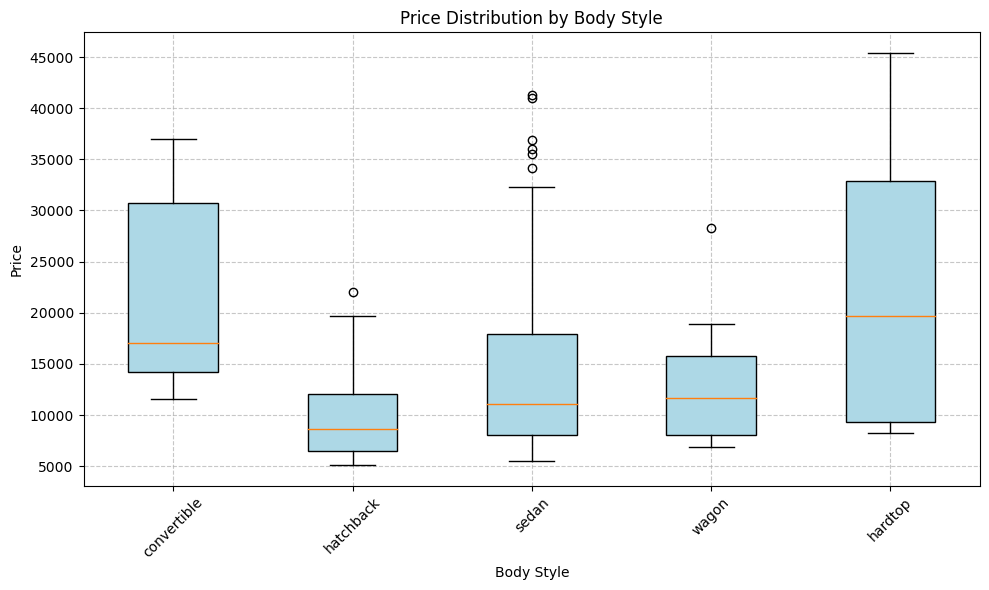

In [35]:
# sns.boxplot(x="body-style", y="price", data=df)
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert price to numeric to ensure proper plotting
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Group the data by body-style
body_styles = df['body-style'].unique()
price_by_body = [df[df['body-style'] == style]['price'].dropna() for style in body_styles]

# Create the box plot
plt.figure(figsize=(10, 6))
box = plt.boxplot(price_by_body, patch_artist=True, labels=body_styles)

# Customize the plot colors
for patch in box['boxes']:
    patch.set_facecolor('lightblue')

# Add labels and title
plt.xlabel('Body Style')
plt.ylabel('Price')
plt.title('Price Distribution by Body Style')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Add some padding at the bottom for rotated labels
plt.tight_layout()

plt.show()

<p>We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":</p>


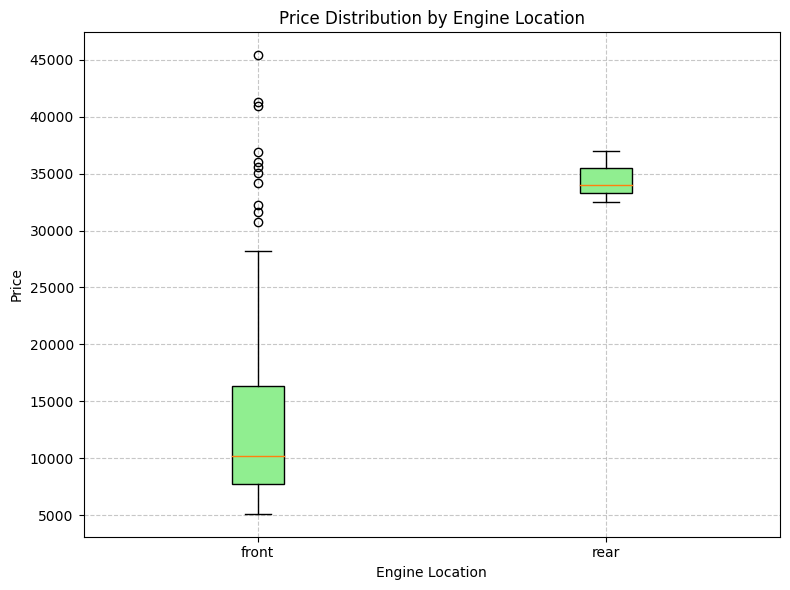

In [36]:
# sns.boxplot(x="engine-location", y="price", data=df)
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert price to numeric to ensure proper plotting
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Group the data by engine-location
engine_locations = df['engine-location'].unique()
price_by_location = [df[df['engine-location'] == location]['price'].dropna() for location in engine_locations]

# Create the box plot
plt.figure(figsize=(8, 6))
box = plt.boxplot(price_by_location, patch_artist=True, labels=engine_locations)

# Customize the plot colors
for patch in box['boxes']:
    patch.set_facecolor('lightgreen')

# Add labels and title
plt.xlabel('Engine Location')
plt.ylabel('Price')
plt.title('Price Distribution by Engine Location')
plt.grid(True, linestyle='--', alpha=0.7)

# Add some padding for better layout
plt.tight_layout()

plt.show()

<p>Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.</p>


 Let's examine "drive-wheels" and "price".


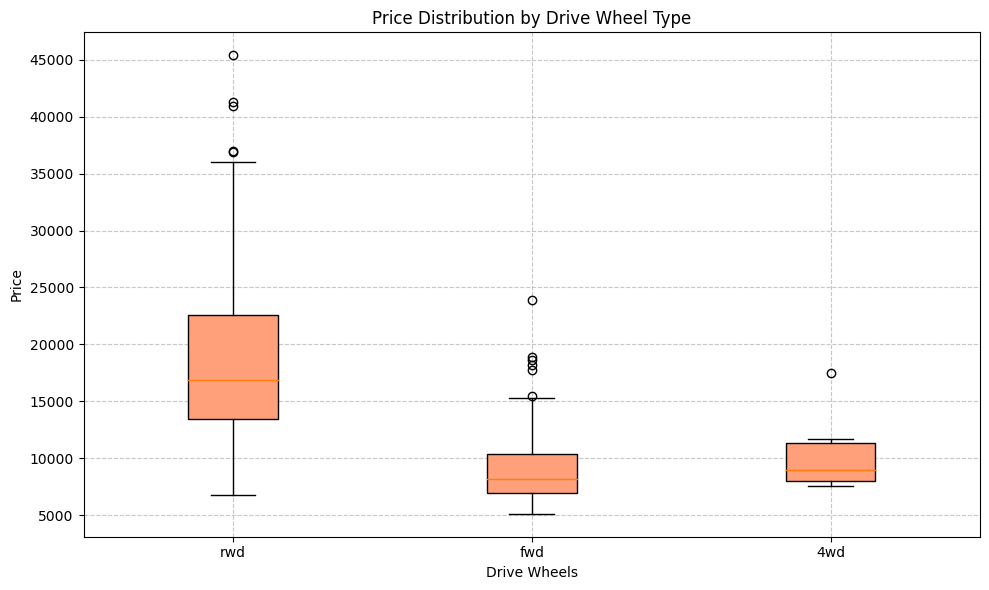

In [37]:
# drive-wheels
# sns.boxplot(x="drive-wheels", y="price", data=df)
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert price to numeric to ensure proper plotting
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Group the data by drive-wheels
drive_wheel_types = df['drive-wheels'].unique()
price_by_drive = [df[df['drive-wheels'] == drive]['price'].dropna() for drive in drive_wheel_types]

# Create the box plot
plt.figure(figsize=(10, 6))
box = plt.boxplot(price_by_drive, patch_artist=True, labels=drive_wheel_types)

# Customize the plot colors
for patch in box['boxes']:
    patch.set_facecolor('lightsalmon')

# Add labels and title
plt.xlabel('Drive Wheels')
plt.ylabel('Price')
plt.title('Price Distribution by Drive Wheel Type')
plt.grid(True, linestyle='--', alpha=0.7)

# Add some padding for better layout
plt.tight_layout()

plt.show()

<p>Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.</p>


<h2 id="discriptive_statistics">3. Descriptive Statistical Analysis</h2>


<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:
<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


 We can apply the method "describe" as follows:


In [38]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,205.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.255423,10.142537,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.316717,3.972040,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.070000,7.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.110000,8.600000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.290000,9.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.410000,9.400000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,4.170000,23.000000,6600.000000,49.000000,54.000000,45400.000000


 The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:


In [39]:
df.describe(include=['object'])

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,horsepower
count,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,52,22,2,2,3,5,3,2,7,7,8,39,60
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,68
freq,41,32,185,168,114,96,120,202,148,159,94,23,19


<h3>Value Counts</h3>


<p>Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "drive-wheels". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket <code>df['drive-wheels']</code>, not two brackets <code>df[['drive-wheels']]</code>.</p>


In [40]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

We can convert the series to a dataframe as follows:


In [41]:
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,120
rwd,76
4wd,9


Let's repeat the above steps but save the results to the dataframe "drive_wheels_counts" and rename the column  'drive-wheels' to 'value_counts'.


In [42]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,count
drive-wheels,
fwd,120
rwd,76
4wd,9


 Now let's rename the index to 'drive-wheels':


In [43]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,count
drive-wheels,
fwd,120
rwd,76
4wd,9


We can repeat the above process for the variable 'engine-location'.


In [44]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,202
rear,3


<p>After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.</p>


<h2 id="basic_grouping">4. Basics of Grouping</h2>


<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>

<p>For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.</p>


In [45]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p>If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.</p>

<p>We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".</p>


In [46]:
df_group_one = df[['drive-wheels','body-style','price']]

We can then calculate the average price for each of the different categories of data.


In [49]:
# Import necessary libraries
import pandas as pd

# Display unique drive-wheels values
print("Unique drive-wheels values:")
print(df['drive-wheels'].unique())


# Create a copy of the dataframe with just the columns we need
df_group_one = df[['drive-wheels', 'body-style', 'price']].copy()

# Convert price to numeric
df_group_one['price'] = pd.to_numeric(df_group_one['price'], errors='coerce')

# grouping results
# df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
# df_group_one

# Instead, group by drive-wheels and calculate mean only for price
df_group_mean = df_group_one.groupby(['drive-wheels'], as_index=False)['price'].mean()


# Display the result
print("\nMean price by drive-wheels type:")
print(df_group_mean)

# If you want to do something with body-style as well, you could count the occurrences
df_body_count = df_group_one.groupby(['drive-wheels', 'body-style'], as_index=False).size()
df_body_count.columns = ['drive-wheels', 'body-style', 'count']

print("\nCount of body styles by drive-wheels type:")
print(df_body_count)

Unique drive-wheels values:
['rwd' 'fwd' '4wd']

Mean price by drive-wheels type:
  drive-wheels         price
0          4wd  10241.000000
1          fwd   9244.779661
2          rwd  19757.613333

Count of body styles by drive-wheels type:
   drive-wheels   body-style  count
0           4wd    hatchback      2
1           4wd        sedan      3
2           4wd        wagon      4
3           fwd  convertible      1
4           fwd      hardtop      1
5           fwd    hatchback     49
6           fwd        sedan     57
7           fwd        wagon     12
8           rwd  convertible      5
9           rwd      hardtop      7
10          rwd    hatchback     19
11          rwd        sedan     36
12          rwd        wagon      9


<p>From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.</p>

<p>You can also group by multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combination of 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'.</p>


In [50]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<p>This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.</p>

<p>In this case, we will leave the drive-wheels variable as the rows of the table, and pivot body-style to become the columns of the table:</p>


In [51]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<p>Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.</p>


In [52]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question 4:</h1>

<p>Use the "groupby" function to find the average "price" of each car based on "body-style".</p>
</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
# grouping results
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

```

</details>


If you did not import "pyplot", let's do it again. 


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

<h4>Variables: Drive Wheels and Body Style vs. Price</h4>


Let's use a heat map to visualize the relationship between Body Style vs Price.


In [ ]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<p>The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.</p>

<p>The default labels convey no useful information to us. Let's change that:</p>


In [ ]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>Visualization is very important in data science, and Python visualization packages provide great freedom. We will go more in-depth in a separate Python visualizations course.</p>

<p>The main question we want to answer in this module is, "What are the main characteristics which have the most impact on the car price?".</p>

<p>To get a better measure of the important characteristics, we look at the correlation of these variables with the car price. In other words: how is the car price dependent on this variable?</p>


<h2 id="correlation_causation">5. Correlation and Causation</h2>


<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>


<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>


<p>Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.</p>


In [ ]:
df.corr()

Sometimes we would like to know the significant of the correlation estimate. 


<b>P-value</b>
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


 We can obtain this information using  "stats" module in the "scipy"  library.


In [ ]:
from scipy import stats

<h3>Wheel-Base vs. Price</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'. 


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).</p>


<h3>Horsepower vs. Price</h3>


 Let's calculate the  Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).</p>


<h3>Length vs. Price</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'length' and 'price'.


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>


<h3>Width vs. Price</h3>


 Let's calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price':


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

#### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).


### Curb-Weight vs. Price


 Let's calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price':


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>


<h3>Engine-Size vs. Price</h3>

Let's calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price':


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>


<h3>Bore vs. Price</h3>


 Let's calculate the  Pearson Correlation Coefficient and P-value of 'bore' and 'price':


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).</p>


 We can relate the process for each 'city-mpg'  and 'highway-mpg':


<h3>City-mpg vs. Price</h3>


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.</p>


<h3>Highway-mpg vs. Price</h3>


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

#### Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.


<h2 id="anova">6. ANOVA</h2>


<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.</p>


<h3>Drive Wheels</h3>


<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>To see if different types of 'drive-wheels' impact  'price', we group the data.</p>


In [ ]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

In [ ]:
df_gptest

 We can obtain the values of the method group using the method "get_group".  


In [ ]:
grouped_test2.get_group('4wd')['price']

We can use the function 'f_oneway' in the module 'stats' to obtain the <b>F-test score</b> and <b>P-value</b>.


In [ ]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated? 

Let's examine them separately.


#### fwd and rwd


In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

 Let's examine the other groups.


#### 4wd and rwd


In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

<h4>4wd and fwd</h4>


In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

We notice that ANOVA for the categories `4wd` and `fwd` yields a high p-value > 0.1, so the calculated F-test score is not very statistically significant. This suggests we can't reject the assumption that the means of these two groups are the same, or, in other words, we can't conclude the difference in correlation to be significant.


<h3>Conclusion: Important Variables</h3>


<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>


### Thank you for completing this lab!


## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork971-2022-01-01" target="_blank">Joseph Santarcangelo</a>


### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork971-2022-01-01" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork971-2022-01-01" target="_blank">Fiorella Wenver</a>

<a href=" https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.



## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-30  | 2.1  | Lakshmi |  changed URL of csv  |
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab  |



<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
